In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# DATA CLEANING

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4' ],inplace=True)

In [8]:
df.sample(3)

,v1,v2
676,ham,Maybe?! Say hi to and find out if got his ca...
3879,ham,Hi juan. Im coming home on fri hey. Of course ...
4331,ham,ALSO TELL HIM I SAID HAPPY BIRTHDAY


In [10]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [12]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

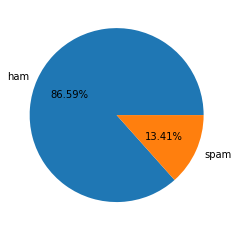

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [14]:
#we conclude that our dataset is imbalanced

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juhig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_char']=df['text'].apply(len)

In [19]:
df['num_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['num_word']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df.head()

,target,text,num_char,num_sent,num_word
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,23
1,ham,Ok lar... Joking wif u oni...,29,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,ham,U dun say so early hor... U c already then say...,49,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [21]:
df[['num_char','num_sent','num_word']].describe()

,num_char,num_sent,num_word
count,5572.000000,5572.000000,5572.000000
mean,80.118808,1.991565,18.501974
std,59.690841,1.501427,13.637741
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,61.000000,1.500000,15.000000
75%,121.000000,2.000000,27.000000
max,910.000000,38.000000,219.000000


# Preprocessing

In [24]:
df.head()

,target,text,num_char,num_sent,num_word
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,23
1,ham,Ok lar... Joking wif u oni...,29,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,ham,U dun say so early hor... U c already then say...,49,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [25]:
#converting categorical variable target into numerical using LabelEncoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [27]:
df.sample()

,target,text,num_char,num_sent,num_word
847,0,I am in office:)whats the matter..msg me now.i...,72,1,19


In [28]:
#for ham messages : we can see average number of char , words and sent are lesser than that for spam
df[df['target']==0][['num_char','num_sent','num_word']].describe()

,num_char,num_sent,num_word
count,4825.000000,4825.000000,4825.000000
mean,71.023627,1.832332,17.076891
std,58.016023,1.431214,13.876308
min,2.000000,1.000000,1.000000
25%,33.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,92.000000,2.000000,22.000000
max,910.000000,38.000000,219.000000


In [29]:
#for spam more number of char, sent and words are used 
df[df['target']==1][['num_char','num_sent','num_word']].describe()

,num_char,num_sent,num_word
count,747.000000,747.000000,747.000000
mean,138.866131,3.020080,27.706827
std,29.183082,1.538034,6.768560
min,13.000000,1.000000,2.000000
25%,132.500000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,44.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

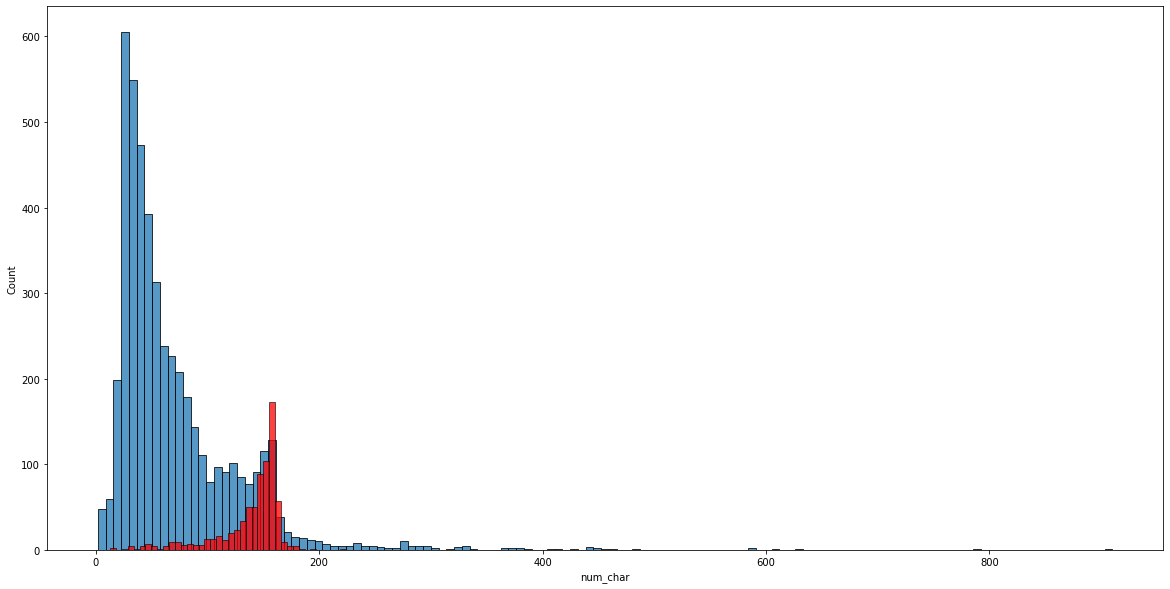

In [32]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

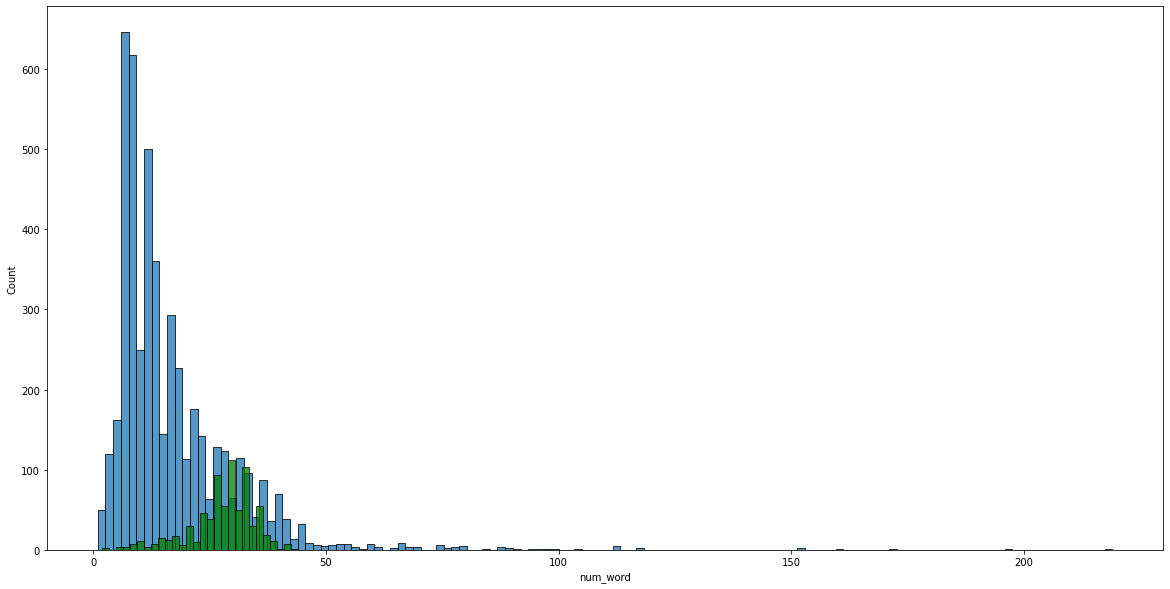

In [34]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='green')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

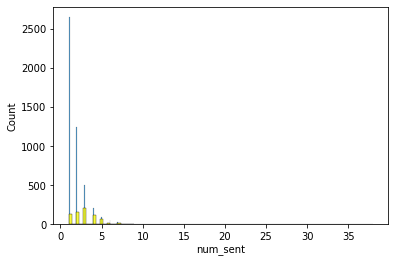

In [36]:
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='yellow')

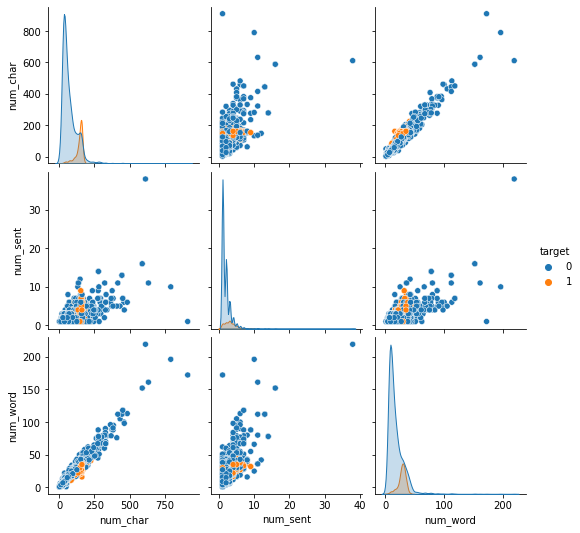

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

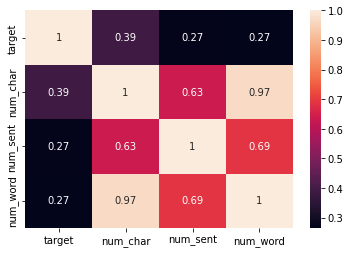

In [39]:
sns.heatmap(df.corr(),annot=True)

In [40]:
#since these three are highly correlated , I'd have to drop two of the features,I'd keep num_char as it has the highest correlation with target column

In [42]:
df.drop(columns=['num_sent','num_word'],inplace=True)

In [43]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
#Now we will work on text column, try to preprocess it:
#I'd bring it in lower case
#I'd apply tokenisation
#Next, I'd remove any special character
#Then , Id remove any stopwords and punctuation
#Then I'd apply stemming or lemmatization

In [45]:
from nltk.corpus import stopwords
import string

In [46]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [51]:
def transform_text(text):
    text=nltk.word_tokenize(text.lower())
    
    y=[]
    
    for i in text:
        if i.isalnum() and (i not in stopwords.words('english')) and (i not in string.punctuation):
            y.append(ps.stem(i))
    return " ".join(y)

In [52]:
transform_text('Abha is Walking across the Beautiful garGDH88n #$ in the backyard.')

'abha walk across beauti gargdh88n backyard'

In [49]:
#Our fucntion is working fine

In [53]:
df['transformed_text']=df['text'].apply(transform_text)

In [55]:
df.sample(4)

,target,text,num_char,transformed_text
2183,0,"Chinatown got porridge, claypot rice, yam cake...",131,chinatown got porridg claypot rice yam cake fi...
4225,0,"Ok thats cool. Its , just off either raglan rd...",131,ok that cool either raglan rd edward rd behind...
2975,0,I love u 2 my little pocy bell I am sorry but ...,54,love u 2 littl poci bell sorri love u
4651,0,Where r e meeting tmr?,22,r e meet tmr


In [56]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [57]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

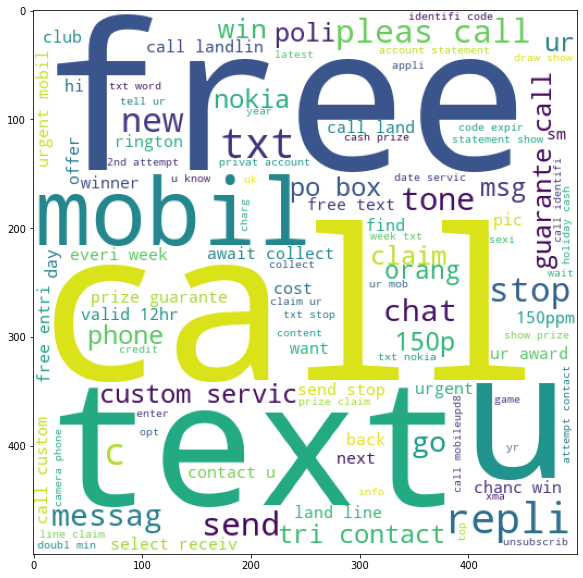

In [60]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [65]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)

11424

In [72]:
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

,0,1
0,call,365
1,free,217
2,2,174
3,txt,169
4,ur,144


C:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


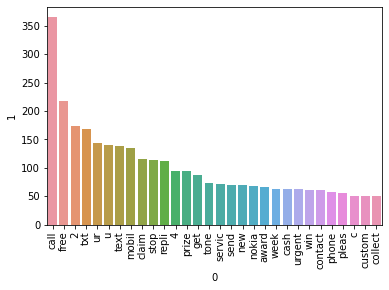

In [75]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [76]:
#Now do the same with wordcloud of ham messages

In [78]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

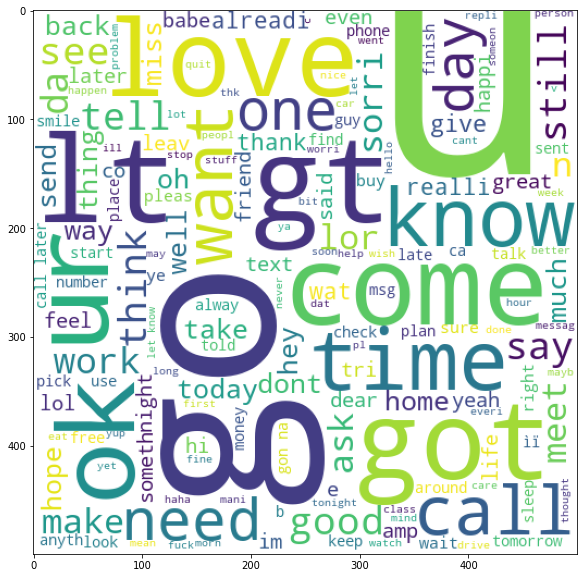

In [79]:
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)

In [80]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

37419

C:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


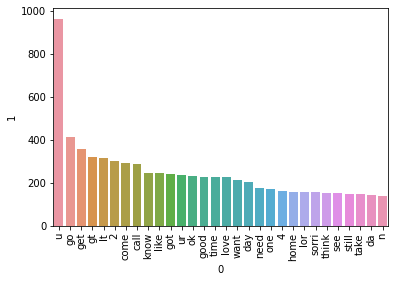

In [84]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [85]:
#Now only one thing is left , text vectorization

In [86]:
#We will first try with BagofWords , then try with tfidf and experiment with various max_features of tfidf to get the best precision

In [87]:
df.head()

,target,text,num_char,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


# MODEL BUILDING

In [130]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=5000)

In [131]:
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [122]:
y=df['target'].values

In [101]:
X.shape

(5572, 5000)

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [126]:
type(y_test)

numpy.ndarray

In [134]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [124]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [135]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [128]:
type(y_pred)

numpy.ndarray

In [136]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9614349775784753
[[957   0]
 [ 43 115]]
1.0


In [137]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9704035874439462
[[955   2]
 [ 31 127]]
0.9844961240310077


In [106]:
#So far bernoulli Naive Bayes is performing the best with BagofWords--> count vectorizer

#When we try tfidf , multinomial NB works great with precision of 1 

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [139]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [140]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'Bagg':bc,
    'Etc':etc,
    'Gradboost':gbc,
    'XGB':xgb
}

In [141]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [142]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.967713004484305, 0.9765625)

In [143]:
accuracy_l=[]
precision_l=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy- ",current_accuracy)
    print("Precision- ",current_precision)
    
    accuracy_l.append(current_accuracy)
    precision_l.append(current_precision)

For  SVC
Accuracy-  0.967713004484305
Precision-  0.9765625
For  KN
Accuracy-  0.9004484304932735
Precision-  1.0
For  NB
Accuracy-  0.9614349775784753
Precision-  1.0
For  DT
Accuracy-  0.9255605381165919
Precision-  0.9032258064516129
For  LR
Accuracy-  0.9452914798206278
Precision-  0.9369369369369369
For  RF
Accuracy-  0.9668161434977578
Precision-  1.0
For  Adaboost
Accuracy-  0.9605381165919282
Precision-  0.9318181818181818
For  Bagg
Accuracy-  0.9632286995515695
Precision-  0.9465648854961832
For  Etc
Accuracy-  0.968609865470852
Precision-  1.0
For  Gradboost
Accuracy-  0.9390134529147982
Precision-  0.9326923076923077
For  XGB
Accuracy-  0.9614349775784753
Precision-  0.967479674796748


In [146]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_l,'Precision':precision_l}).sort_values('Precision',ascending=False)

In [147]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900448,1.000000
2,NB,0.961435,1.000000
5,RF,0.966816,1.000000
8,Etc,0.968610,1.000000
0,SVC,0.967713,0.976562
10,XGB,0.961435,0.967480
7,Bagg,0.963229,0.946565
4,LR,0.945291,0.936937
9,Gradboost,0.939013,0.932692
6,Adaboost,0.960538,0.931818


In [148]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [149]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900448
1,NB,Accuracy,0.961435
2,RF,Accuracy,0.966816
3,Etc,Accuracy,0.968610
4,SVC,Accuracy,0.967713
5,XGB,Accuracy,0.961435
6,Bagg,Accuracy,0.963229
7,LR,Accuracy,0.945291
8,Gradboost,Accuracy,0.939013
9,Adaboost,Accuracy,0.960538


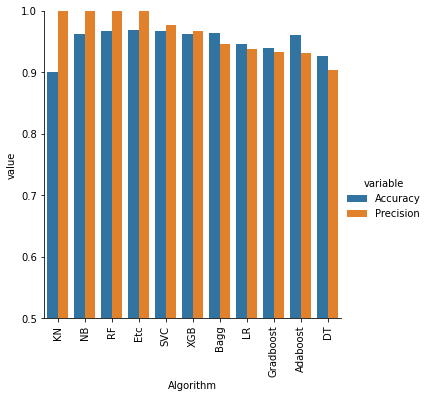

In [153]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [154]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [155]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
# new_df = performance_df.merge(temp_df,on='Algorithm')
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
# new_df_scaled.merge(temp_df,on='Algorithm')

In [156]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))